## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

## 2. Importing Data

In [2]:
df= pd.read_csv("forestfires (1).csv")
df1= df.copy()
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## 3. Data Understanding

In [6]:
print('No. of observations:{}\nNo. of features:{}'.format(df1.shape[0],df1.shape[1]))

No. of observations:517
No. of features:31


In [7]:
df1[df1.columns[0:11]].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
df1[df1.columns[0:11]].isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

### Finding Correlation

In [9]:
corr= df1[df1.columns[0:11]].corr()

<AxesSubplot:>

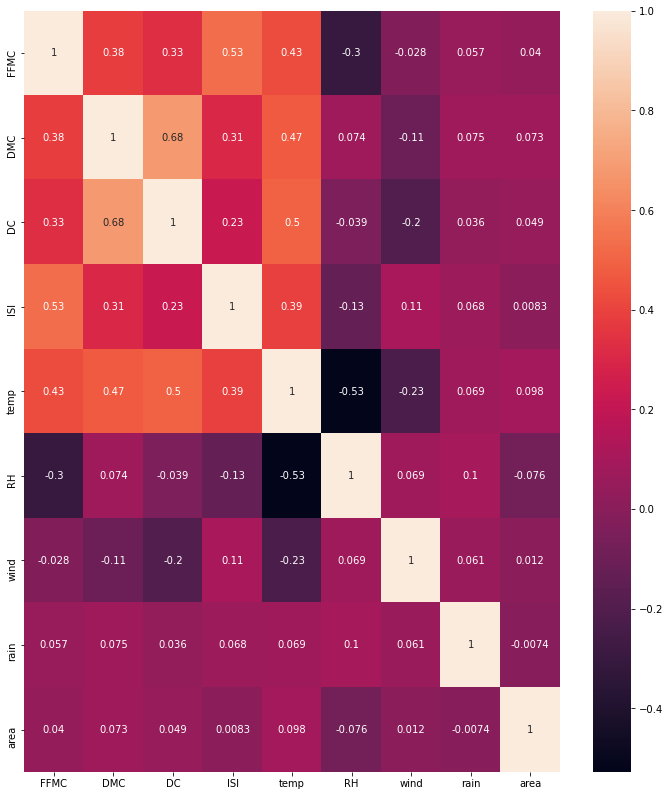

In [10]:
plt.figure(figsize=(12,14))
sns.heatmap(corr,annot=True)

### Outlier Check

C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


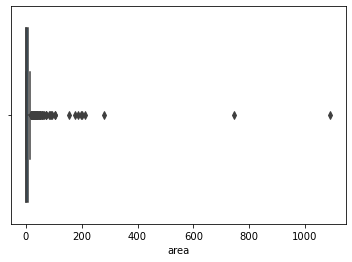

In [11]:
ax= sns.boxplot(df1['area'])

### There are 3 Outlier instances in our data

In [12]:
plt.rcParams["figure.figsize"]= 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


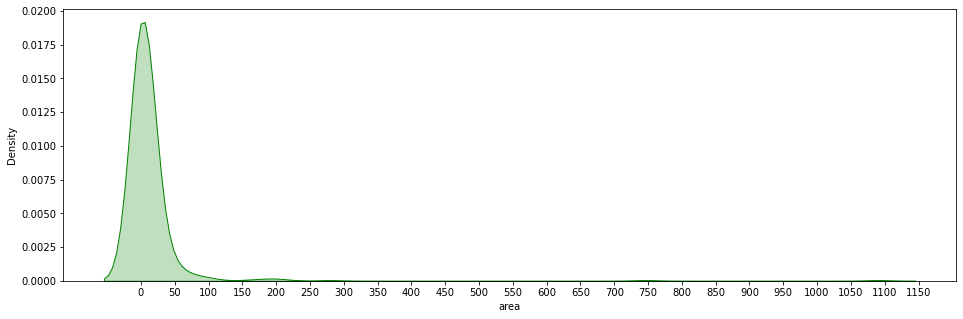

In [13]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['area'].skew()))
print("Kurtosis: {}".format(df1['area'].kurtosis()))
ax= sns.kdeplot(df1['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

#### >>The Data is highly skewed and has large kurtosis value
#### >>Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land

In [14]:
dfa= df1[df1.columns[0:10]]
month_colum= dfa.select_dtypes(include='object').columns.tolist()

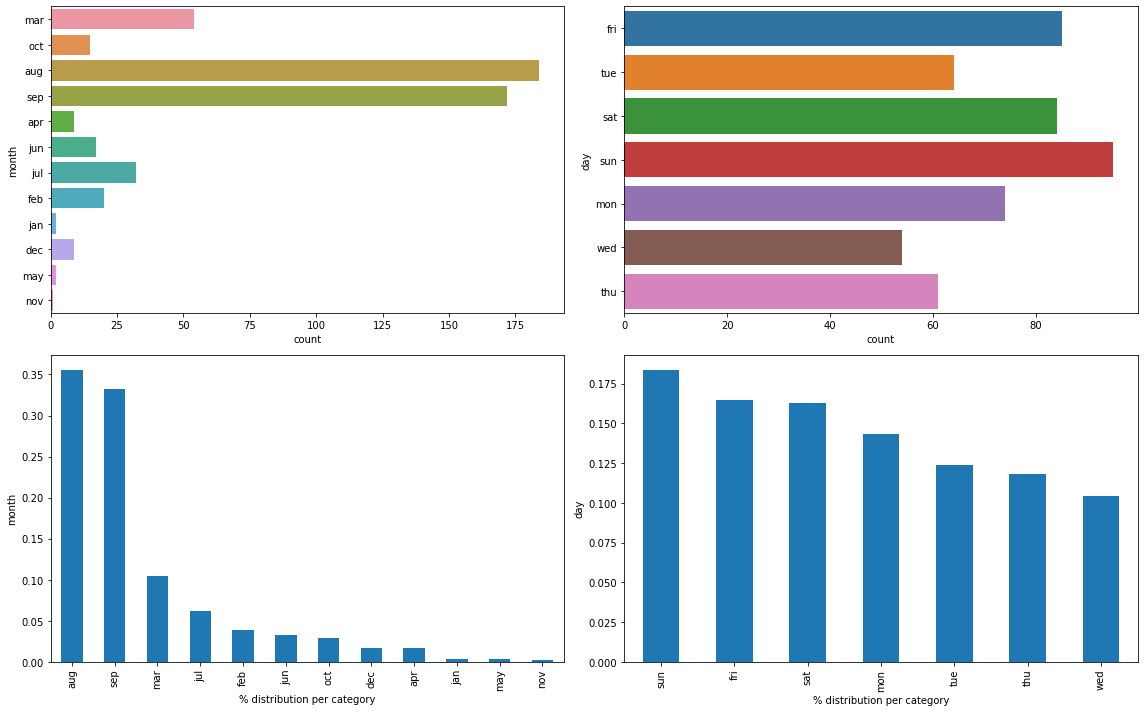

In [15]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

#### >>Majority of the fire accors in the month Aug and Sep
#### >>For Days, Sun and Fri have recorded the most cases

In [16]:
num_column= dfa.select_dtypes(exclude='object').columns.tolist()

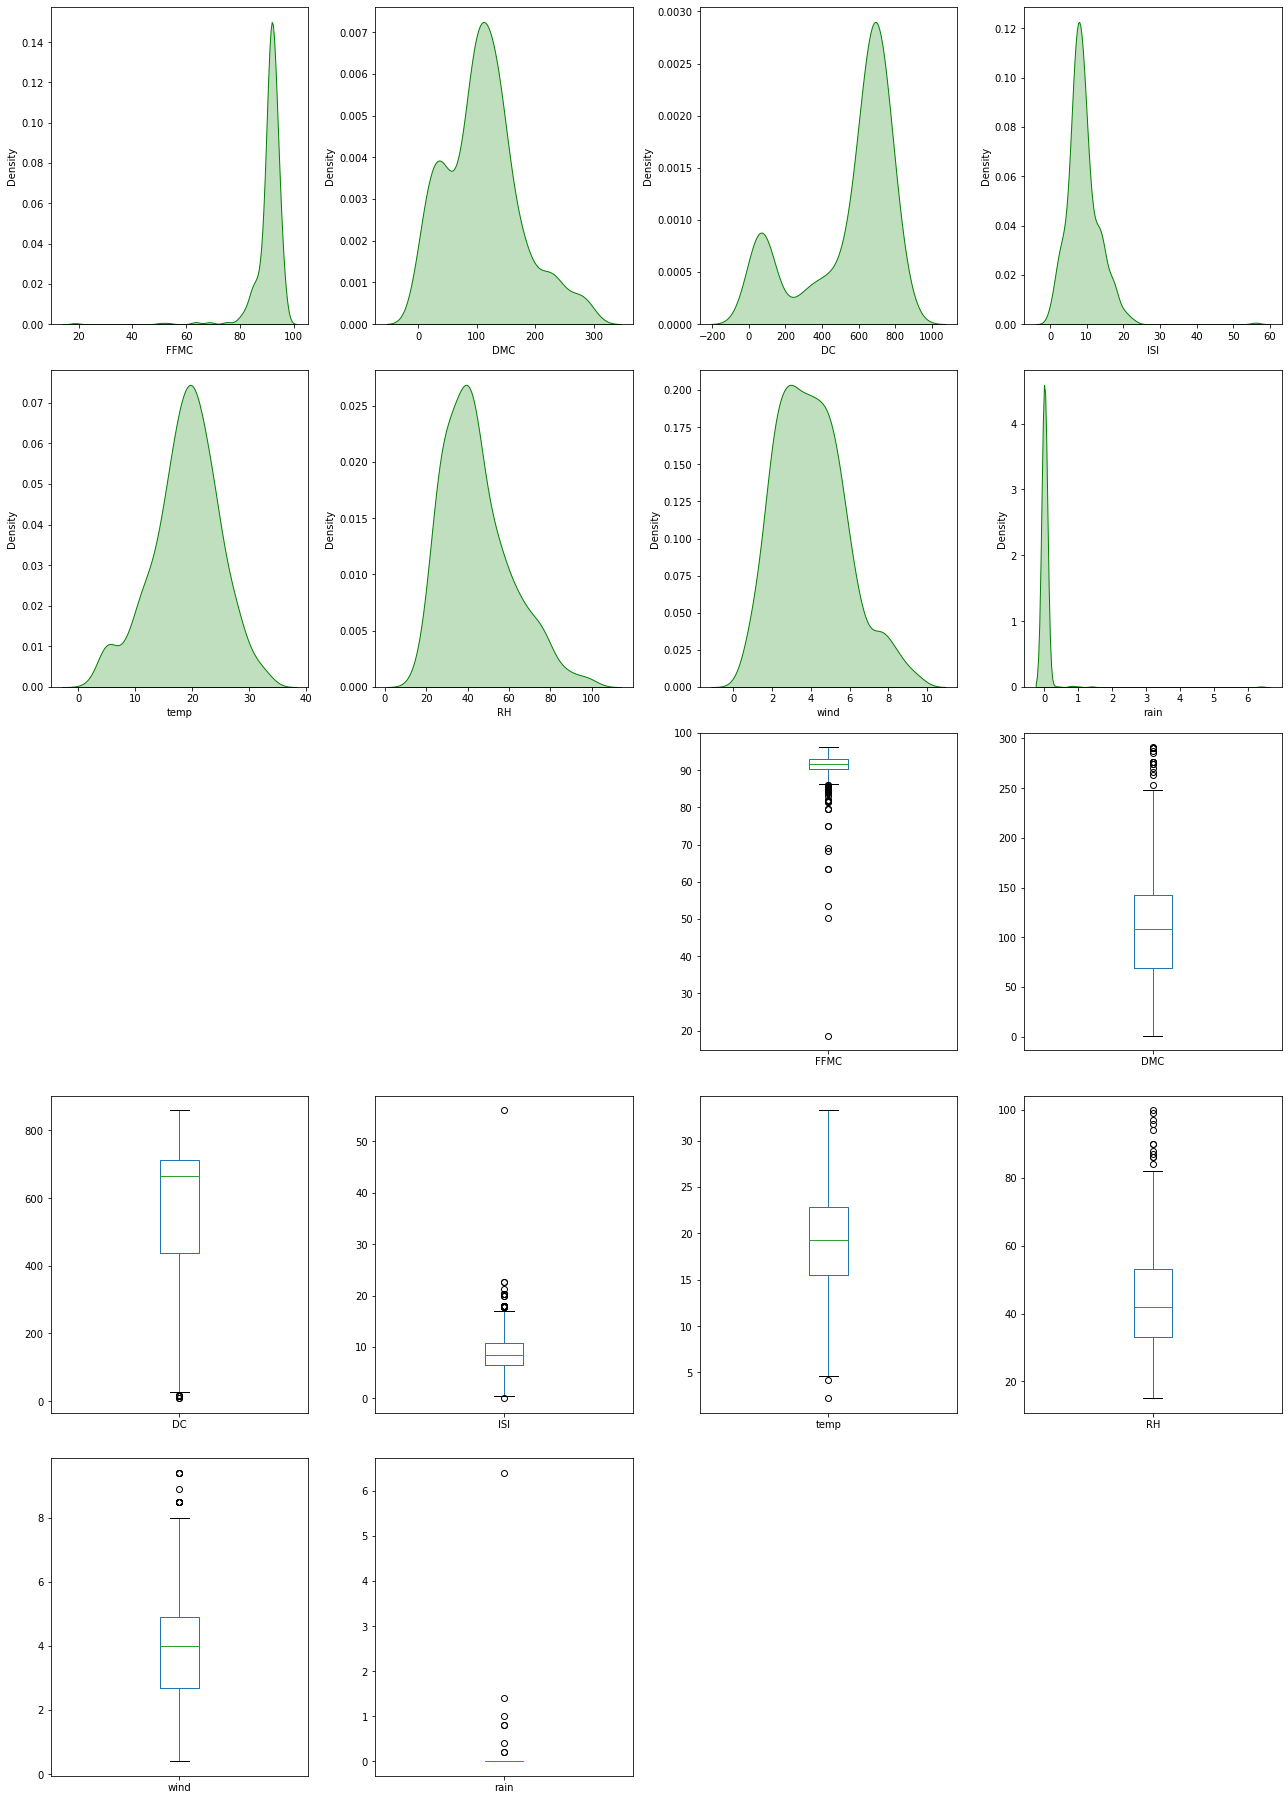

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [17]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_column,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_column]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

## 4. SVM

In [18]:
X= df1.iloc[:,2:30]
y= df1.iloc[:,30]

In [19]:
mapping= {'small': 1, 'large': 2}

In [20]:
y= y.replace(mapping)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.20, stratify= y)

### 4.1 Linear

In [22]:
model_linear= SVC(kernel= "linear")
model_linear.fit(x_train,y_train)
pred_test_linear= model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.9711538461538461


### 4.2 Poly

In [23]:
model_poly= SVC(kernel= "poly")
model_poly.fit(x_train,y_train)
pred_test_poly= model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.7884615384615384


### 4.3 RBF

In [24]:
model_rbf= SVC(kernel= "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf= model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.7692307692307693


### 4.4 Sigmoid

In [25]:
model_sigmoid= SVC(kernel= "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid= model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.7307692307692307


## 4 - Conclusion
###### Linear Model gives the best accuracy.
Below is an example on how we can plot the data. Using PCA to select only 2 variables


In [26]:
ytt= y_train.to_numpy()

In [27]:
pca= PCA(n_components= 2)

In [28]:
x_train2= pca.fit_transform(x_train)

In [29]:
model_linear.fit(x_train2,ytt)

SVC(kernel='linear')

In [30]:
SVC(kernel='linear')

SVC(kernel='linear')

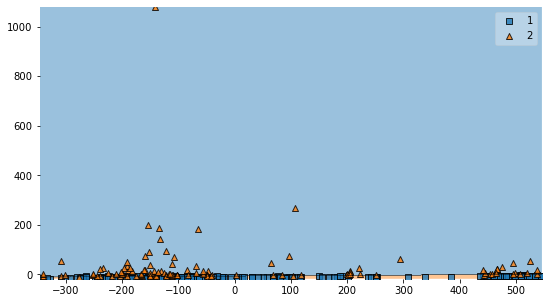

In [31]:
plot_decision_regions(x_train2,ytt, clf=model_linear)
plt.show()